# Physics 420/580 Midterm Exam 
## October 19, 2017 1pm-2pm

Do the following problems.  Use the Jupyter notebook, inserting your code and any textual answers/explanations in cells between the questions. (Feel free to add additional cells!)  Marks will be given based on how clearly you demonstrate your understanding.    

There are no restrictions on downloading from the internet, eclass,  or the use of books, notes, or any other widely available computing resources.  However, **you are not allowed** to communicate with each other or collaborate in any way and uploading to the internet or sending or receiving direct communications is not appropriate.  

When you are finished, upload the jupyter notebook to eclass. Eclass times out after 2:05 so make sure that you upload things before then.  Also be careful to save the notebook periodically and that you upload your final exam file.


In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)
import scipy
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.optimize import minimize

In [128]:
def add_labels(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

## Graphics

Plot the two curves:
$$\begin{align} y&=4x^3-3x-2\\
x&=\sin(\frac{y^4}{4}-2y^2+2)
\end{align}
$$

How many intersections are there?  Read the x,y value corresponding to the intersections from the plots.

-1.003003003003003 -0.9989530322886594 -3.027135351676109 -3.033033033033033
-0.9269269269269269 -0.9215843306305107 -2.4048576848864625 -2.4124124124124124
-0.7267267267267268 -0.7301862872716743 -1.3550496090333228 -1.3513513513513509
-0.7227227227227226 -0.7301862872716743 -1.3418254762942792 -1.3513513513513509
0.35435435435435414 0.36154579807944365 -2.885082198233187 -2.8928928928928928
0.3583583583583585 0.36154579807944365 -2.890992531507922 -2.8928928928928928
0.3623623623623624 0.36154579807944365 -2.896764979540448 -2.8928928928928928
0.3663663663663663 0.36154579807944365 -2.902398001713533 -2.8928928928928928


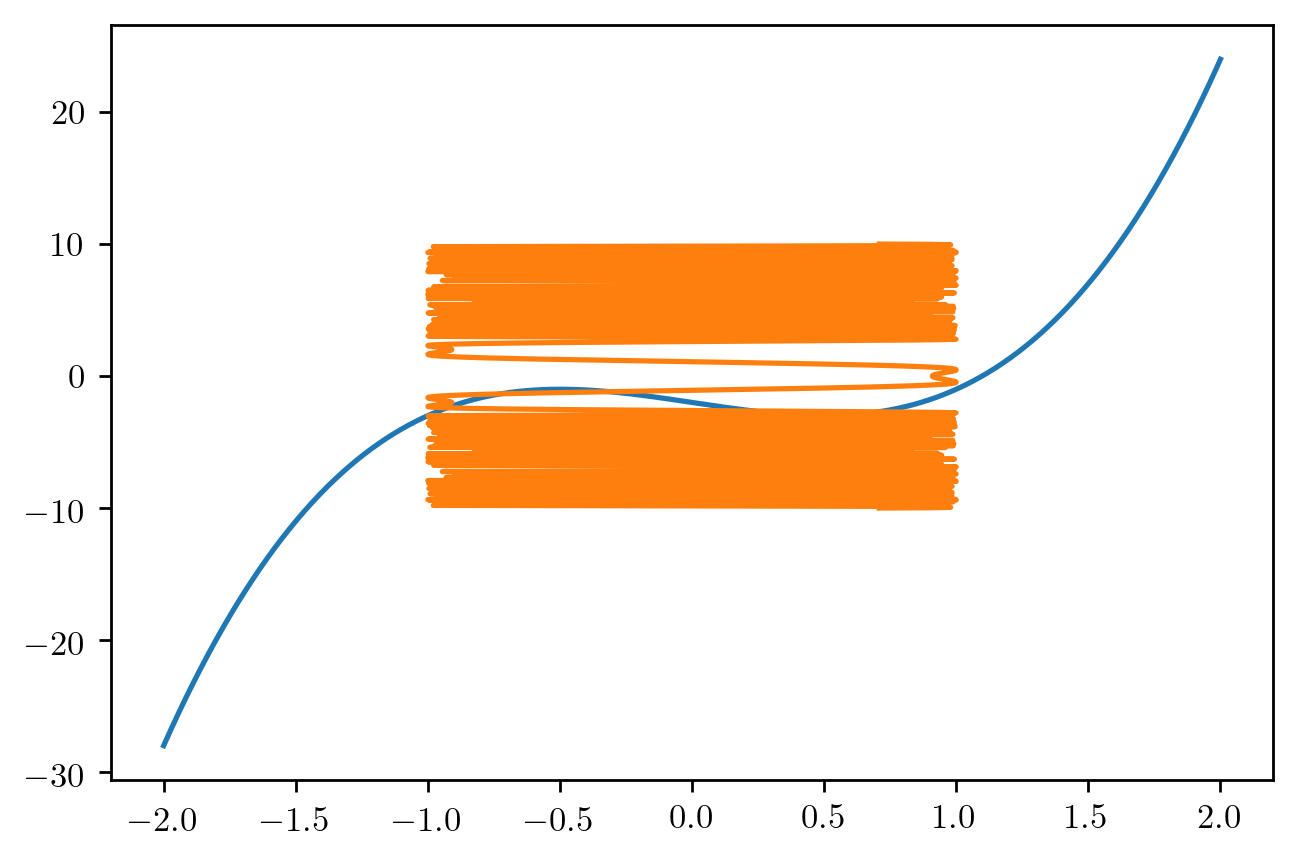

In [42]:
xdata = np.linspace(-2, 2)

y1 = lambda x: 4*x**3 - 3*x - 2

xdata = np.linspace(-2, 2, 1000)
plt.plot(xdata, y1(xdata))

x1 = lambda y: np.sin(y**4/4 - 2*y**2 + 2)

ydata = np.linspace(-10, 10,1000)
plt.plot(x1(ydata), ydata)

curve1_x = xdata
curve1_y = y1(xdata)

curve2_x = x1(ydata)
curve2_y = ydata

tol = 1e-2
for x1, y1, in zip(curve1_x, curve1_y):
    for x2, y2, in zip(curve2_x, curve2_y):
        if np.abs(x1 - x2) < tol and np.abs(y1 - y2) < tol:
            print(x1, x2, y1, y2)

# Reconstruction

A instantaneous flash of light occurs in a large tank of water at time $t_0$ and at position $\vec{x_0}$  

The group velocity of light in water is about $2.2 \times 10^8$ m/s.  Four sensors detect the light flash, and report a measurement of the time at which light strikes the sensor.  The locations of the sensors and the time which each sensor was hit is recorded in the table below:

|Sensor #|	x|	y|	z|		Time|
|--------|------------|------------|------------|------------|
|	|[m]|	[m]|	[m]|		[s]|
|1	|0	|0|	10	|	6.3859E-08|
|2	|8.66025404|	0|	-5|		1.1032E-07|
|3	|-4.33012702|	7.5|	-5|		7.9394E-08|
|4	|-4.33012702|	-7.5|	-5|		1.0759E-07|

Calculate the initial time $t_0$ and the location of the flash.  

Here is a sketch of the general geometry.  Note that the gray region is not different from the rest of the water- it is just to show the tetrahedral arrangement of the light sensors.  The flash, shown as the yellow star is in an arbitrary location which you want to find.  
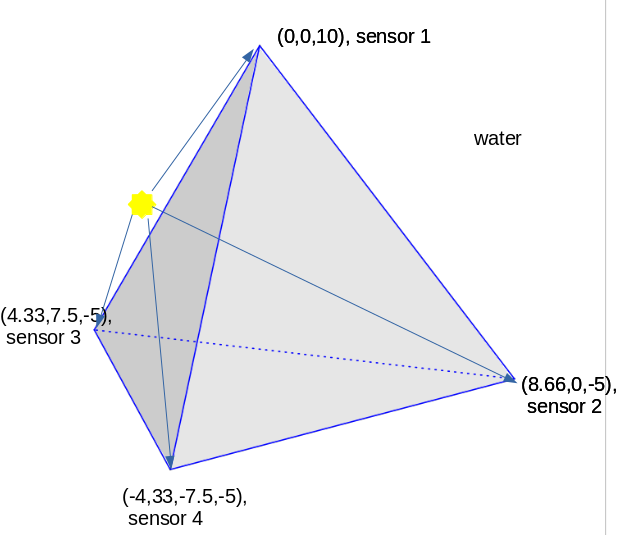


In [143]:
sen1 = np.array([0, 0, 10, 6.3859E-08])
sen2 = np.array([8.66025404,	0,	-5, 1.1032E-07])
sen3 = np.array([4.33012702,	7.5,	-5,	7.9394E-08])
sen4 = np.array([-4.33012702,	-7.5,	-5,	1.0759E-07])

def cost(pos):
    error = 0
    for sen in [sen1, sen2, sen3, sen4]:
        error += (np.linalg.norm(pos - sen[0:3]) - sen[3])**2
    
    return error

sol = minimize(cost, np.random.randn(3))

print('solution is ', sol.x)

solution is  [ 2.16506317e+00 -8.15860127e-08 -1.24999934e+00]


In [121]:
'''
Alternative solution

'''

class Sensor():
    def __init__(self, position, time):
        self.position = position
        self.time = time
        self.velocity = 2.2*10**8
        
    def draw_radius(self):
        r = self.velocity*self.time
        possible_vals = []
        for phi in np.linspace(0, 2*np.pi):
            for theta in np.linspace(0, np.pi):
                x = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
                possible_vals.append(self.position + r*x)
        return np.array(possible_vals)
        

In [194]:
sen1 = Sensor(np.array([0, 0, 10]), 6.3859E-08)
sen2 = Sensor(np.array([8.66025404,	0,	-5]), 1.1032E-07)
sen3 = Sensor(np.array([4.33012702,	7.5,	-5]),	7.9394E-08)
sen4 = Sensor(np.array([-4.33012702,	-7.5,	-5]),	1.0759E-07)

circ = []
for i in [sen1, sen2, sen3, sen4]:
    circ.append(i.draw_radius())

In [200]:
tol = 18
mask = np.abs(circ[0]-circ[1]-circ[2]-circ[3]) < tol

for i, j in enumerate(mask):
    if j.all() == True:
        print(i, j)
        print(circ[0][i])

1010 [ True  True  True]
[-7.04232267  4.58404406 21.25904395]
1460 [ True  True  True]
[-7.04232267 -4.58404406 21.25904395]


## Trajectories

An alpha-particle is a helium nucleus, with mass 6.644×10−27 kg or 4.002 u, and charge equal to twice the charge of an electron (but positive).  Calculate the trajectory of a 5MeV=(5*1.609 e-13 J) alpha particle as it moves by a gold nucleus (mass 196.966 u), with charge 79e, as a function of  the impact parameter b, below.  Assume both the alpha and the gold are point particles, and ignore special relativity.  Plot the scattering angle $\theta$ and energy loss of the alpha as a function of $b$, for values of b between 1e-16 and 1e-9m.  

The force between two charge particles is given by the Coulomb potential:
$$\vec{F}=\frac{1}{4\pi\epsilon_0}\frac{q_1q_2 (\vec{r_2}-\vec{r_1})}{|\vec{r_2}-\vec{r_1}|^3}$$ with $\epsilon_0=8.85\times10^{-12}\frac{\rm{C}^2}{\rm{N\cdot m^2}}$


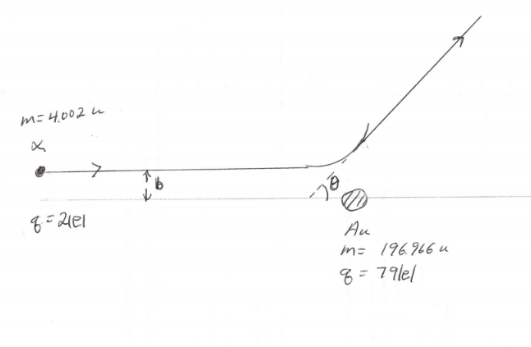



In [103]:
eps = 8.85*10**-12
elementary_charge = 1.60*10**-19

q1 = 2*elementary_charge
q2 = 79*elementary_charge

u = 1.66*10**-27
m1 = 4*u
m2 = 196.966*u


def CouloubsLaw(r1, r2, q1, q2): 
    distance = np.linalg.norm(r2-r1)
    direction = (r2-r1)/distance    
    F = (1/(4*np.pi*eps))*(q2/distance**2)*direction
    return F

In [113]:
kinetic = 5*1.609e-13
velocity = np.sqrt(2*kinetic/m1)
velocity

15566607.758546297

In [123]:
import numpy as np
from scipy.integrate import odeint

def main(y, t, m1 = m1, m2 = m2): 
    '''
    Main function to be integrated with odeint.
    Input: y (array of elements 12), t (scalar)
    Output: dydt (array of elements 12)   
    '''
    
    particle1_x = y[0:2]
    particle1_dx = y[2:4]
    
    particle2_x = np.array([0, velocity])
    
    F = CouloubsLaw(particle1_x, particle2_x, q1, q2)

    dxdt = np.zeros(4)
    
    dxdt[0:2] = particle1_dx
    dxdt[2:4] = F/m1
    
    #print(y[0:2])
    
    return dxdt

b = 1e-16
y0 = np.array([0, b, velocity, 0])
t = np.linspace(0, 3, num=500)
y = odeint(main, y0, t)


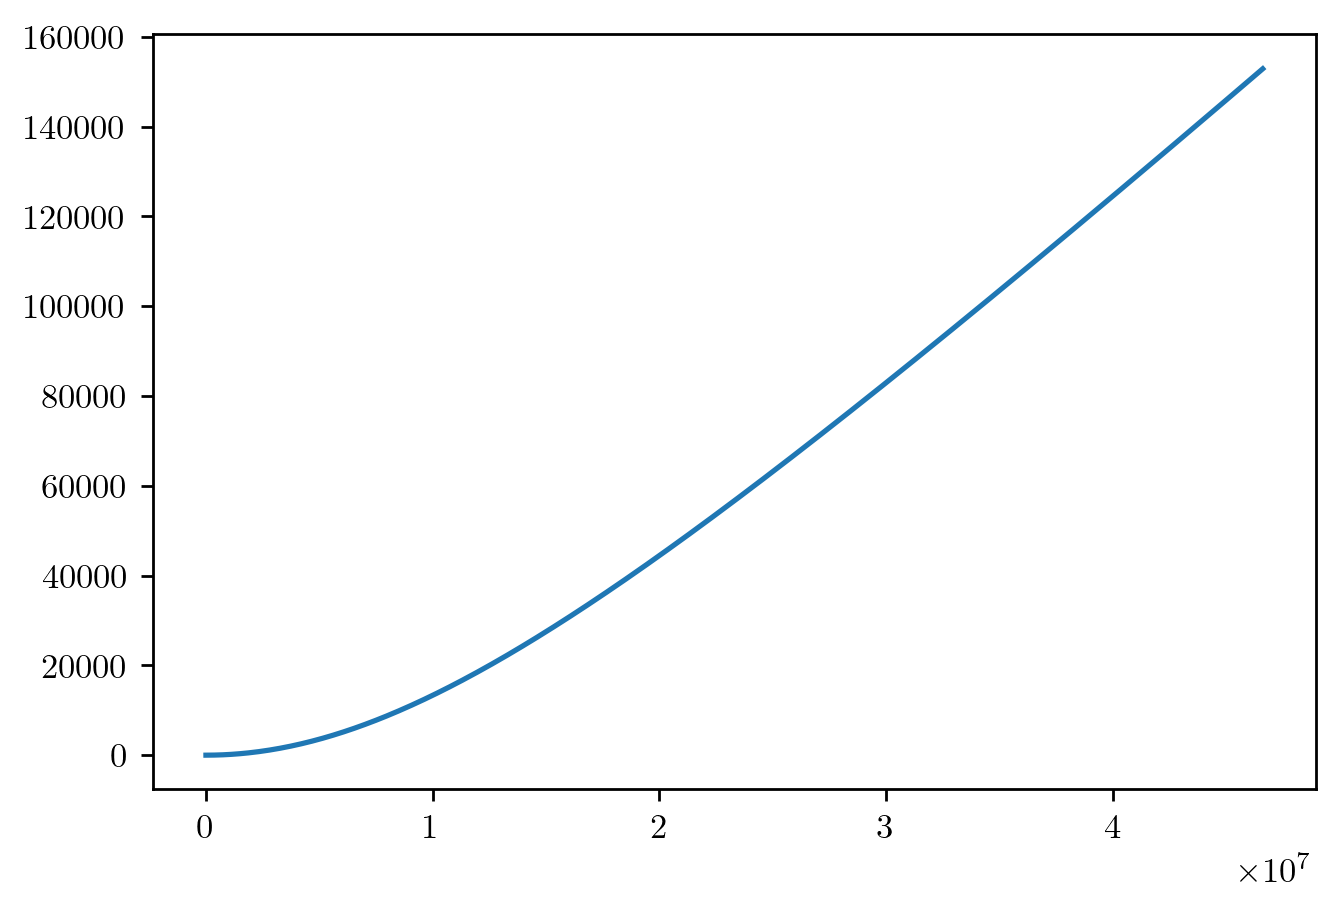

In [124]:
y

plt.plot(y[:,0], y[:,1])

In [125]:
energy = 1/2*m1*y[:, 2]**2 + 1/2*m1*y[:, 3]**2
plt.plot(t, energy)

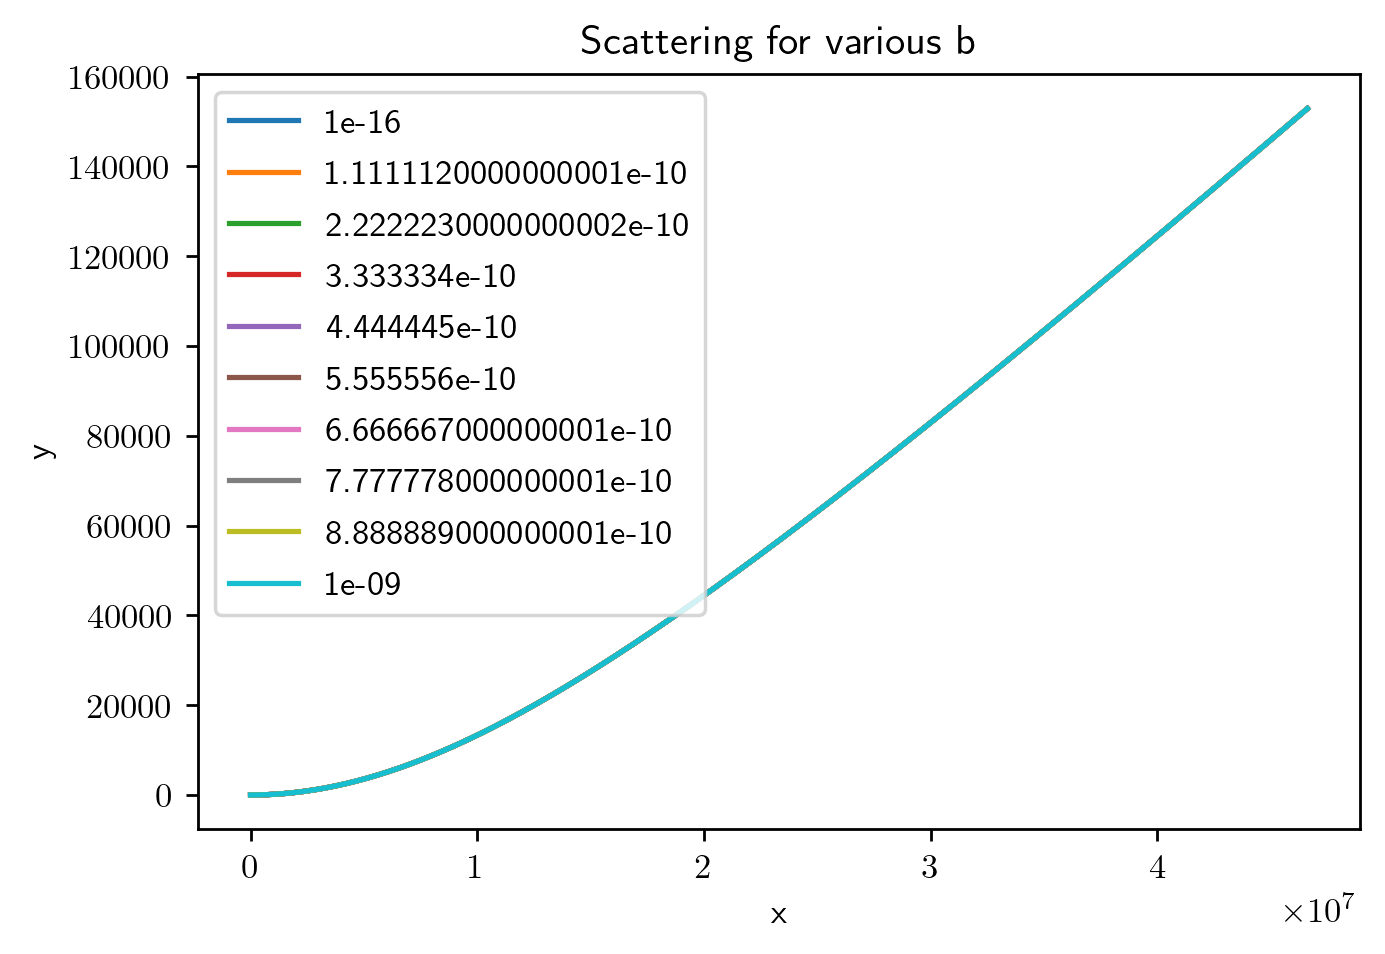

In [132]:
for b in np.linspace(1e-16, 1e-9, num=10):
    y0 = np.array([0, b, velocity, 0])
    t = np.linspace(0, 3, num=500)
    y = odeint(main, y0, t)
    plt.plot(y[:,0], y[:,1], label=b)
    
add_labels('x', 'y', 'Scattering for various b')

# Don't forget to upload your work to eclass!